In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
import warnings
from sklearn.preprocessing import StandardScaler

 
warnings.filterwarnings("ignore")
%matplotlib inline

In [39]:
df = pd.read_excel("kor_etf_data_final.xlsx")
r_df = pd.read_excel("kor_random_data_final.xlsx")

In [40]:
df.head()

,Unnamed: 0,index,date,KOD_p,KBS_p,TIG_p,KOD_v,KBS_v,TIG_v,month,...,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,263,2012-01-25,16513.015625,93433.015625,10870,2836393,2014,21902,1,...,0,0,0,0,0,0,0,1,0,0
1,1,268,2012-02-01,1263.925903,93600.031250,10835,890,2013,6415,2,...,0,0,0,0,0,0,0,1,0,0
2,2,269,2012-02-02,1252.214722,93591.156250,10665,1630,3019,22187,2,...,0,0,0,0,0,0,0,0,1,0
3,3,270,2012-02-03,1198.162109,93617.820313,10570,1960,2263,13551,2,...,0,0,0,0,0,0,0,0,0,1
4,4,272,2012-02-07,16175.183594,93538.734375,10615,1842404,2012,10603,2,...,0,0,0,0,0,0,1,0,0,0


In [41]:
r_df.head()

,Unnamed: 0,index,date,KOD_p,KBS_p,TIG_p,KOD_v,KBS_v,TIG_v,month,...,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,263,2012-01-25,16513.015625,93433.015625,10870,2836393,2014,21902,1,...,0,0,0,0,0,0,0,1,0,0
1,1,268,2012-02-01,1263.925903,93600.031250,10835,890,2013,6415,2,...,0,0,0,0,0,0,0,1,0,0
2,2,269,2012-02-02,1252.214722,93591.156250,10665,1630,3019,22187,2,...,0,0,0,0,0,0,0,0,1,0
3,3,270,2012-02-03,1198.162109,93617.820313,10570,1960,2263,13551,2,...,0,0,0,0,0,0,0,0,0,1
4,4,272,2012-02-07,16175.183594,93538.734375,10615,1842404,2012,10603,2,...,0,0,0,0,0,0,1,0,0,0


In [42]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
r_df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [43]:
print(df.columns)
print(r_df.columns)

Index(['index', 'date', 'KOD_p', 'KBS_p', 'TIG_p', 'KOD_v', 'KBS_v', 'TIG_v',
       'month', 'week',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=108)
Index(['index', 'date', 'KOD_p', 'KBS_p', 'TIG_p', 'KOD_v', 'KBS_v', 'TIG_v',
       'month', 'week',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=108)


In [44]:
df_col = ['KOD', 'KBS', 'TIG']

dummy = ['month_1', 
         'month_2', 
         'month_3', 
         'month_4', 
         'month_5', 
         'month_6', 
         'month_7', 
         'month_8', 
         'month_9',
         'month_10',
         'month_11',
         'month_12',
         'MON', 'TUE','WED', 'THU', 'FRI']

td = [1, 3, 5, 10, 20, 40, 60, 120, 250]

In [45]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
lw=2

KOD
Real Data Processing for horizon =  1
AUC good =  0.7266356328856328


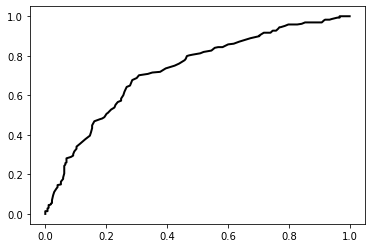

Random Data Processing for horizon =  1
Random data AUC =  0.723983770858771


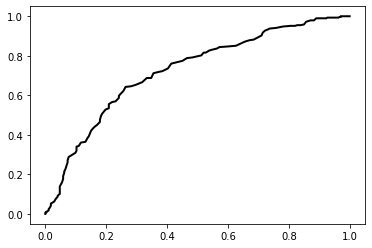

C =  200
Real_data_accuracy   :  0.6863
Random data_accuracy :  0.6738
Gain =  0.0125
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.871640041784504


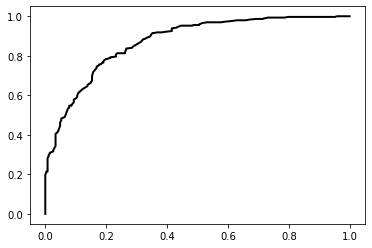

Random Data Processing for horizon =  3
Random data AUC =  0.87516242452037


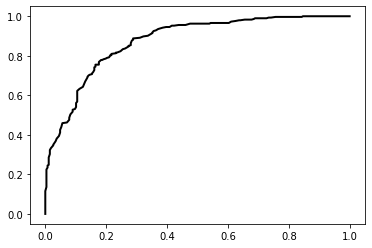

C =  200
Real_data_accuracy   :  0.7807
Random data_accuracy :  0.7914
Gain =  -0.0107
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9212348230431413


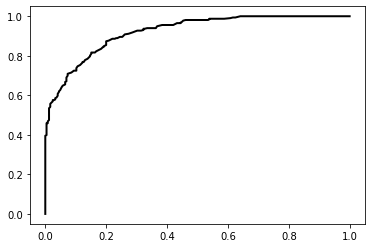

Random Data Processing for horizon =  5
Random data AUC =  0.9252260397830018


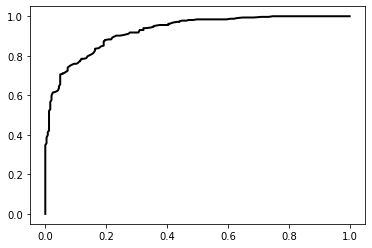

C =  200
Real_data_accuracy   :  0.8289
Random data_accuracy :  0.836
Gain =  -0.0071
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.939713984141695


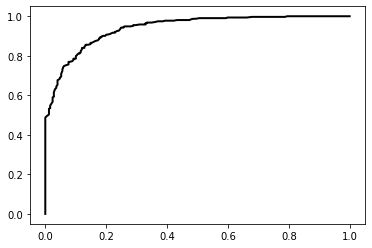

Random Data Processing for horizon =  10
Random data AUC =  0.9390832561013284


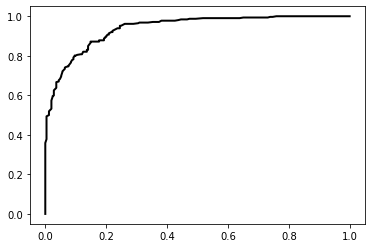

C =  200
Real_data_accuracy   :  0.861
Random data_accuracy :  0.852
Gain =  0.009
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9535136897001303


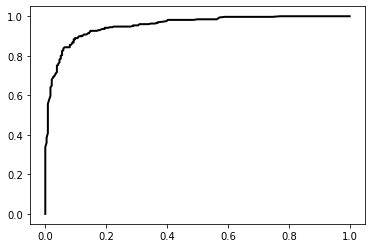

Random Data Processing for horizon =  20
Random data AUC =  0.9550521512385919


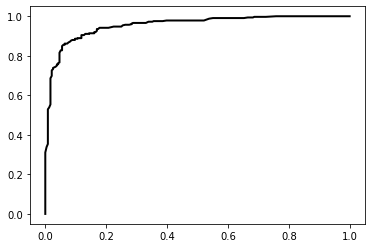

C =  200
Real_data_accuracy   :  0.893
Random data_accuracy :  0.8877
Gain =  0.0053
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9712186803095894


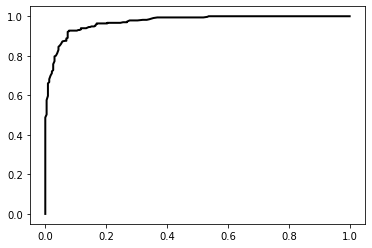

Random Data Processing for horizon =  40
Random data AUC =  0.9708382526564344


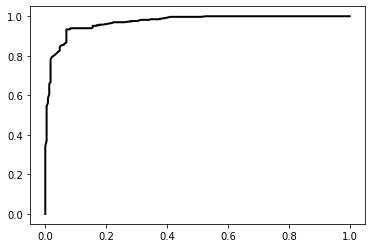

C =  200
Real_data_accuracy   :  0.9073
Random data_accuracy :  0.9055
Gain =  0.0018
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9775389841388717


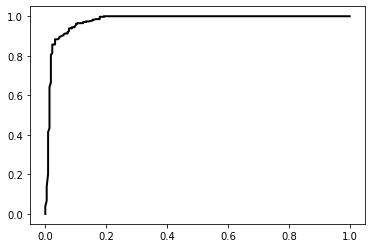

Random Data Processing for horizon =  60
Random data AUC =  0.9774921764249606


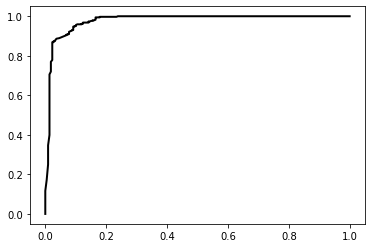

C =  200
Real_data_accuracy   :  0.9323
Random data_accuracy :  0.9287
Gain =  0.0036
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9813256885649984


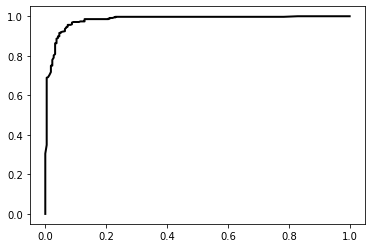

Random Data Processing for horizon =  120
Random data AUC =  0.9829064408959384


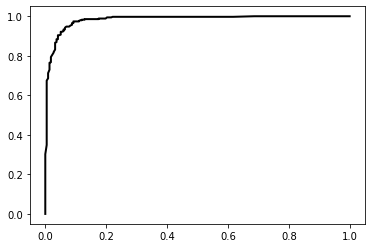

C =  200
Real_data_accuracy   :  0.9447
Random data_accuracy :  0.9447
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9778897248382175


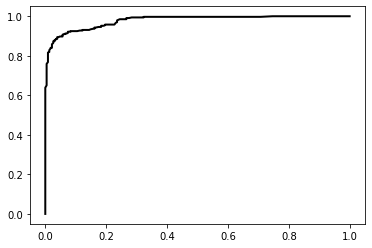

Random Data Processing for horizon =  250
Random data AUC =  0.9790800757615615


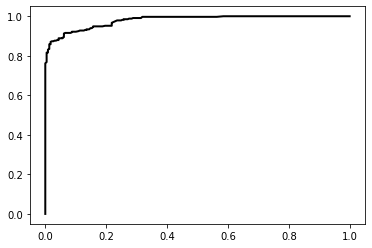

C =  200
Real_data_accuracy   :  0.9091
Random data_accuracy :  0.9091
Gain =  0.0
---------------------------------------------

KBS
Real Data Processing for horizon =  1
AUC good =  0.7018902767447228


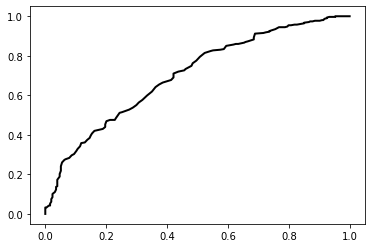

Random Data Processing for horizon =  1
Random data AUC =  0.7088601913360177


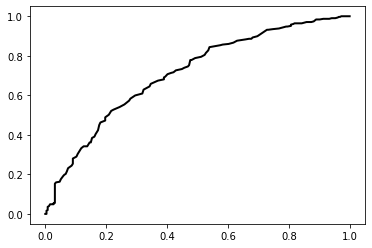

C =  200
Real_data_accuracy   :  0.6453
Random data_accuracy :  0.6506
Gain =  -0.0053
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8419390581717452


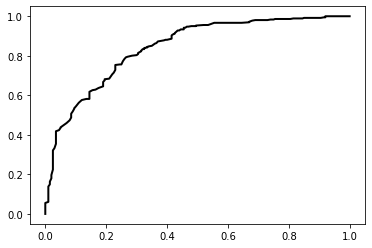

Random Data Processing for horizon =  3
Random data AUC =  0.8472714681440443


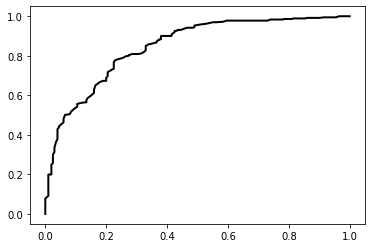

C =  200
Real_data_accuracy   :  0.7807
Random data_accuracy :  0.795
Gain =  -0.0143
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9201516477107028


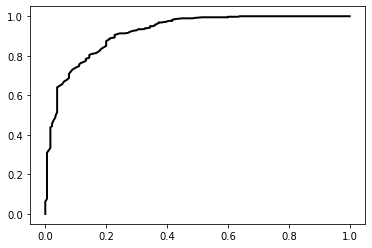

Random Data Processing for horizon =  5
Random data AUC =  0.917344706911636


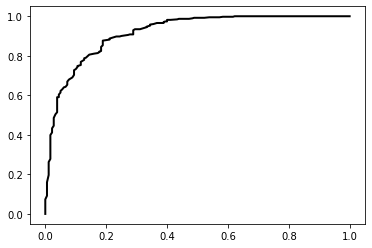

C =  200
Real_data_accuracy   :  0.852
Random data_accuracy :  0.8556
Gain =  -0.0036
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9192643297728299


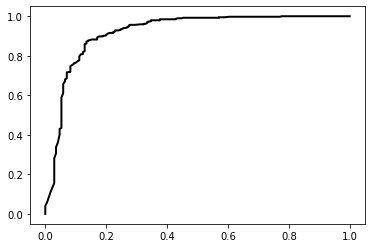

Random Data Processing for horizon =  10
Random data AUC =  0.9176094478712201


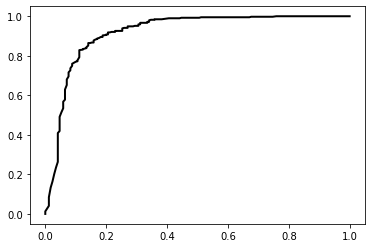

C =  200
Real_data_accuracy   :  0.8788
Random data_accuracy :  0.8788
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9846884431031423


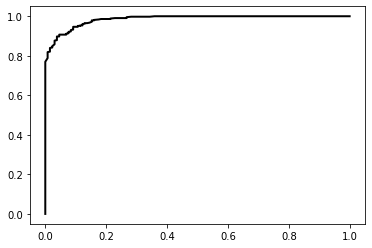

Random Data Processing for horizon =  20
Random data AUC =  0.9850434936978519


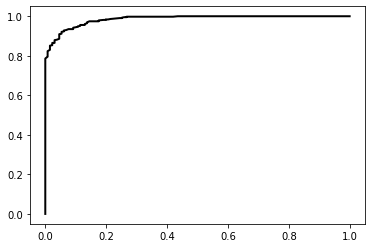

C =  200
Real_data_accuracy   :  0.9412
Random data_accuracy :  0.9447
Gain =  -0.0035
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9809618291761149


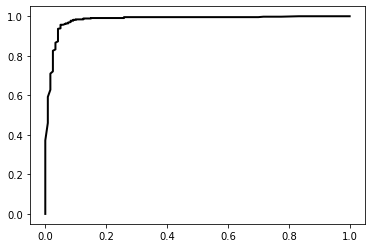

Random Data Processing for horizon =  40
Random data AUC =  0.9816421012849584


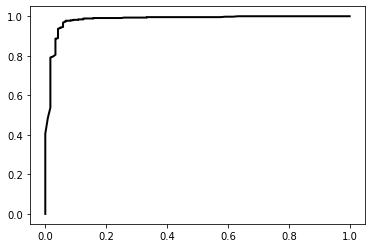

C =  200
Real_data_accuracy   :  0.9626
Random data_accuracy :  0.9626
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9805308020147231


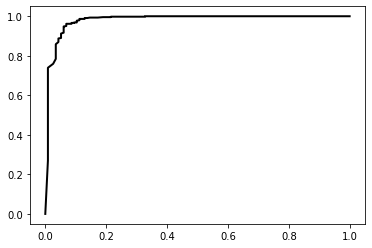

Random Data Processing for horizon =  60
Random data AUC =  0.9835141418055017


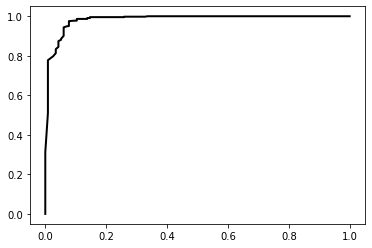

C =  200
Real_data_accuracy   :  0.9643
Random data_accuracy :  0.9626
Gain =  0.0017
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9979557262254349


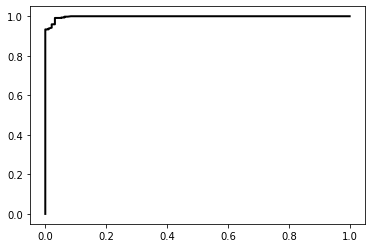

Random Data Processing for horizon =  120
Random data AUC =  0.9978201942624803


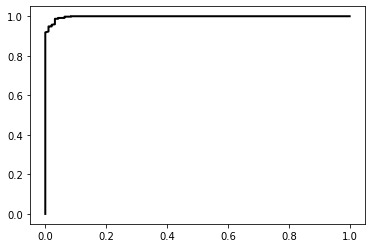

C =  200
Real_data_accuracy   :  0.984
Random data_accuracy :  0.9857
Gain =  -0.0017
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9951981050818259


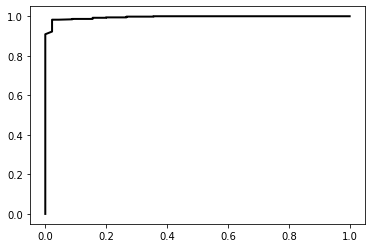

Random Data Processing for horizon =  250
Random data AUC =  0.9960594315245479


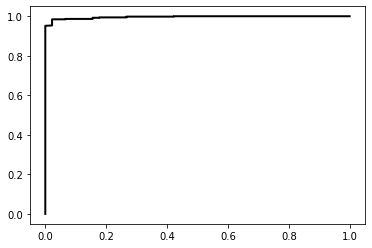

C =  200
Real_data_accuracy   :  0.9804
Random data_accuracy :  0.9786
Gain =  0.0018
---------------------------------------------

TIG
Real Data Processing for horizon =  1
AUC good =  0.7170835029513536


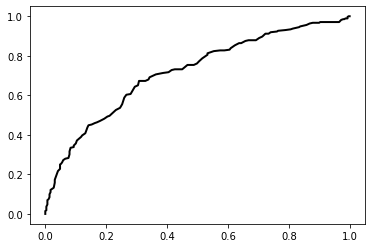

Random Data Processing for horizon =  1
Random data AUC =  0.716339303887645


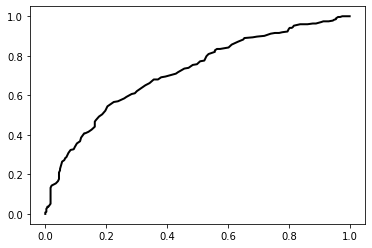

C =  200
Real_data_accuracy   :  0.6738
Random data_accuracy :  0.6613
Gain =  0.0125
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8678521440386817


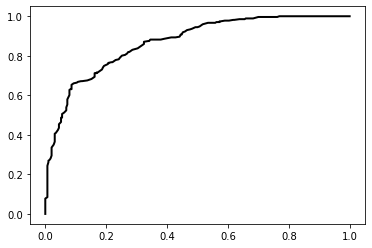

Random Data Processing for horizon =  3
Random data AUC =  0.8711731772490139


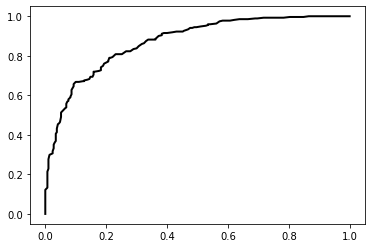

C =  200
Real_data_accuracy   :  0.7754
Random data_accuracy :  0.7843
Gain =  -0.0089
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9234229641901364


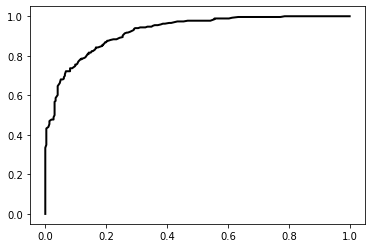

Random Data Processing for horizon =  5
Random data AUC =  0.9239263412769211


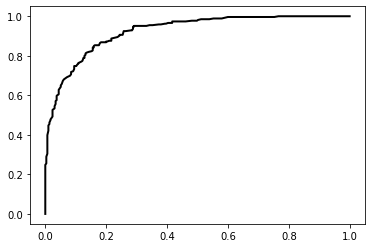

C =  200
Real_data_accuracy   :  0.8342
Random data_accuracy :  0.836
Gain =  -0.0018
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9503018185522898


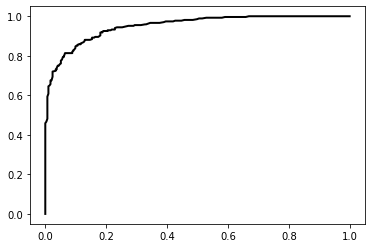

Random Data Processing for horizon =  10
Random data AUC =  0.9491110997911466


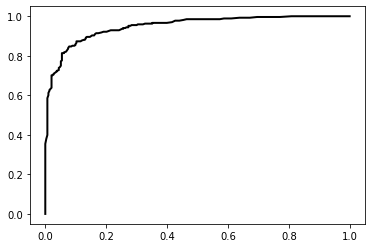

C =  200
Real_data_accuracy   :  0.8752
Random data_accuracy :  0.877
Gain =  -0.0018
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9835384146031423


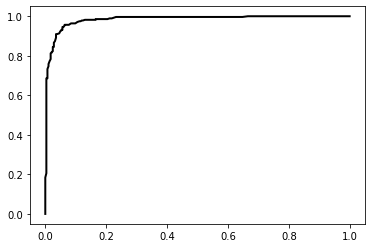

Random Data Processing for horizon =  20
Random data AUC =  0.9838689174759748


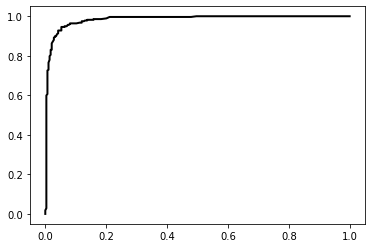

C =  200
Real_data_accuracy   :  0.9447
Random data_accuracy :  0.9394
Gain =  0.0053
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9870150505923629


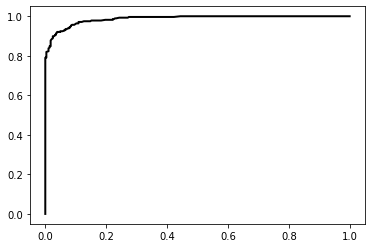

Random Data Processing for horizon =  40
Random data AUC =  0.9870913204860935


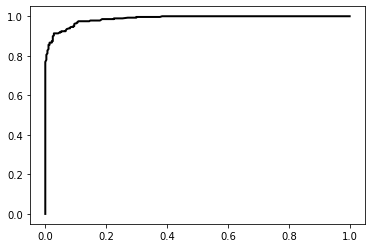

C =  200
Real_data_accuracy   :  0.9323
Random data_accuracy :  0.934
Gain =  -0.0017
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9945779303330791


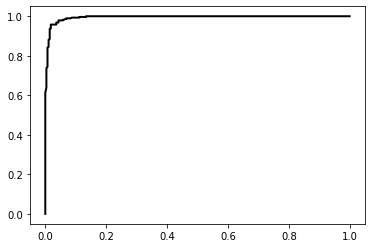

Random Data Processing for horizon =  60
Random data AUC =  0.9954614797864226


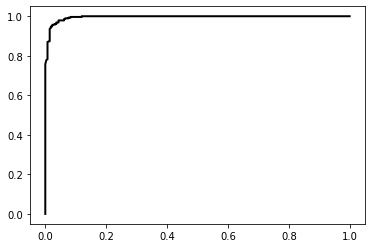

C =  200
Real_data_accuracy   :  0.9643
Random data_accuracy :  0.9643
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9892739273927392


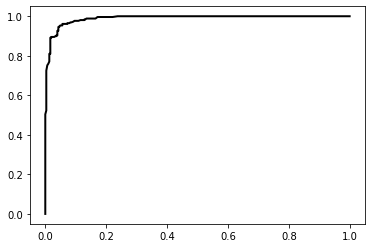

Random Data Processing for horizon =  120
Random data AUC =  0.9889093560518842


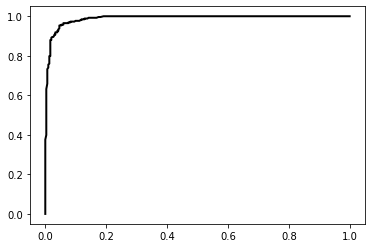

C =  200
Real_data_accuracy   :  0.9501
Random data_accuracy :  0.9537
Gain =  -0.0036
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9973991744296313


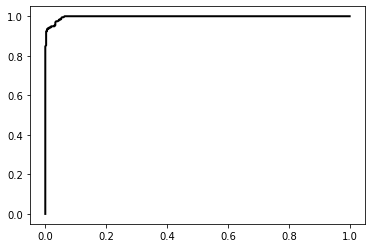

Random Data Processing for horizon =  250
Random data AUC =  0.9972388018073297


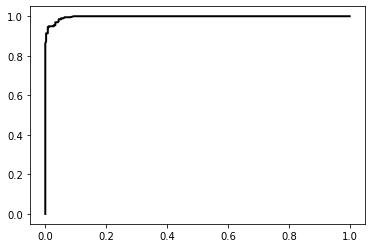

C =  200
Real_data_accuracy   :  0.9643
Random data_accuracy :  0.9643
Gain =  -0.0
---------------------------------------------

Wall time: 5min 37s


In [51]:
%%time


all_result = {}

for i in df_col:
    
    print(i)
    
    sub_result = {}
    
    for j in td:
                                
        y_col = str(i)+"_"+str(j)+"_y"
        p_col = str(i)+"_p"
        v_col = str(i)+"_v"
                
                
        X = df.drop([y_col,p_col,v_col, "date","month","week"], axis = 1)
        y = df[y_col]
        
        
        r_X = r_df.drop([y_col,p_col,v_col,"date","month","week"], axis = 1)
        r_y = r_df[y_col]
                
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(r_X, r_y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        
        r_sc = StandardScaler()
        r_sc.fit(r_X_train)
        r_X_train_std = r_sc.transform(X_train)
        r_X_test_std = r_sc.transform(X_test)
        
        
        print("Real Data Processing for horizon = ",j)
        
        maxval = -10000.0
        c = 0.0
        sval = 0.0
        
        
        
        for numtrees in {100,200,300}:
            lw=2
            clf = RandomForestClassifier(n_estimators=numtrees, 
                                         criterion='gini')
            
            scores = cross_val_score(clf, X_train_std, y_train, cv=3)
            ascores = scores.mean()
            
            r_scores = cross_val_score(clf, r_X_train_std, r_y_train, cv=3)
            r_ascores = scores.mean()
            
            
            real_random = ascores - r_ascores
            
            sval = sval + real_random
            
            if maxval < real_random:
                
                maxval = real_random
                c = numtrees
                
        clf = RandomForestClassifier(n_estimators=int(c),criterion='gini')
        clf.fit(X_train_std,y_train)

        predictions = clf.predict(X_test_std)
        probs = clf.predict_proba(X_test_std)
        
        #print(predictions)


        fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("AUC good = ",roc_auc)        
        plt.plot(fpr, tpr, lw=lw, color='black')
        #plt.title("Horizon = "+str(filename))
        plt.show()
        
        
        print("Random Data Processing for horizon = ",j)
        
        
        clf = RandomForestClassifier(n_estimators=int(c),criterion='gini')
        clf.fit(r_X_train_std,y_train)

        r_predictions = clf.predict(r_X_test_std)
        r_probs = clf.predict_proba(r_X_test_std)
        
        #print(r_predictions)


        fpr, tpr, thresholds = roc_curve(r_y_test, r_probs[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("Random data AUC = ",roc_auc)        
        plt.plot(fpr, tpr, lw=lw, color='black')
        #plt.title("Horizon = "+str(filename))
        plt.show()
        
        print ("C = ",c)
        real_accuracy = round(metrics.accuracy_score(y_test, predictions),4)
        random_accuracy = round(metrics.accuracy_score(r_y_test, r_predictions),4)
        
        print("Real_data_accuracy   : ", real_accuracy)
        print("Random data_accuracy : ", random_accuracy)
                
        gain = (real_accuracy - metrics.accuracy_score(r_y_test,r_predictions))
        
        print ("Gain = ",round(gain,4))
        print ("---------------------------------------------\n")
        
        v_real_accuracy = str(j) + "_real_accuracy"
        v_random_accuracy = str(j) + "_random_accuracy"
        v_gain = str(j) +"_gain"
        
        sub_result[v_real_accuracy] = real_accuracy 
        sub_result[v_random_accuracy] = random_accuracy
        sub_result[v_gain] = gain
        
    all_result[i] = sub_result

In [52]:
all_result

{'KOD': {'1_real_accuracy': 0.6863,
  '1_random_accuracy': 0.6738,
  '1_gain': 0.012503208556149725,
  '3_real_accuracy': 0.7807,
  '3_random_accuracy': 0.7914,
  '3_gain': -0.010743850267379784,
  '5_real_accuracy': 0.8289,
  '5_random_accuracy': 0.836,
  '5_gain': -0.007107130124777261,
  '10_real_accuracy': 0.861,
  '10_random_accuracy': 0.852,
  '10_gain': 0.008950089126559702,
  '20_real_accuracy': 0.893,
  '20_random_accuracy': 0.8877,
  '20_gain': 0.005299465240641732,
  '40_real_accuracy': 0.9073,
  '40_random_accuracy': 0.9055,
  '40_gain': 0.0017741532976827123,
  '60_real_accuracy': 0.9323,
  '60_random_accuracy': 0.9287,
  '60_gain': 0.0036012477718360136,
  '120_real_accuracy': 0.9447,
  '120_random_accuracy': 0.9447,
  '120_gain': -4.1532976827074464e-05,
  '250_real_accuracy': 0.9091,
  '250_random_accuracy': 0.9091,
  '250_gain': 9.090909090958554e-06},
 'KBS': {'1_real_accuracy': 0.6453,
  '1_random_accuracy': 0.6506,
  '1_gain': -0.00532388591800359,
  '3_real_accurac

In [53]:
final_results = pd.DataFrame(all_result)

In [54]:
final_results

,KOD,KBS,TIG
1_real_accuracy,0.686300,0.645300,0.673800
1_random_accuracy,0.673800,0.650600,0.661300
1_gain,0.012503,-0.005324,0.012481
3_real_accuracy,0.780700,0.780700,0.775400
3_random_accuracy,0.791400,0.795000,0.784300
3_gain,-0.010744,-0.014309,-0.008914
5_real_accuracy,0.828900,0.852000,0.834200
5_random_accuracy,0.836000,0.855600,0.836000
5_gain,-0.007107,-0.003615,-0.001807
10_real_accuracy,0.861000,0.878800,0.875200


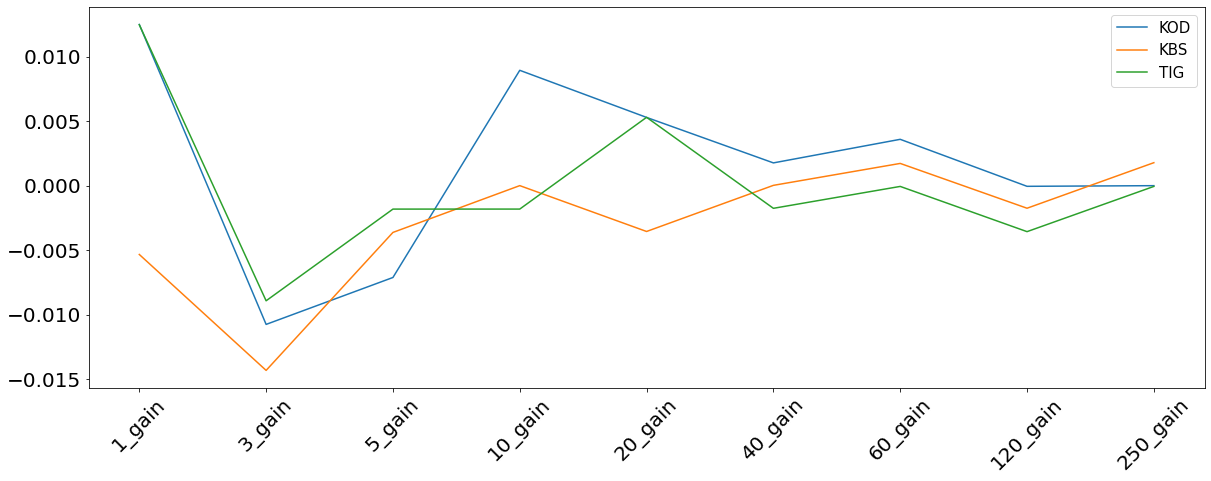

In [55]:
plt.figure(figsize = (20,7))
plt.plot(final_results[final_results.index.str.contains('gain')])
plt.xticks(rotation = 45, fontsize = 20)
plt.legend(final_results.columns, fontsize=15)
plt.yticks(fontsize = 20)
plt.show()

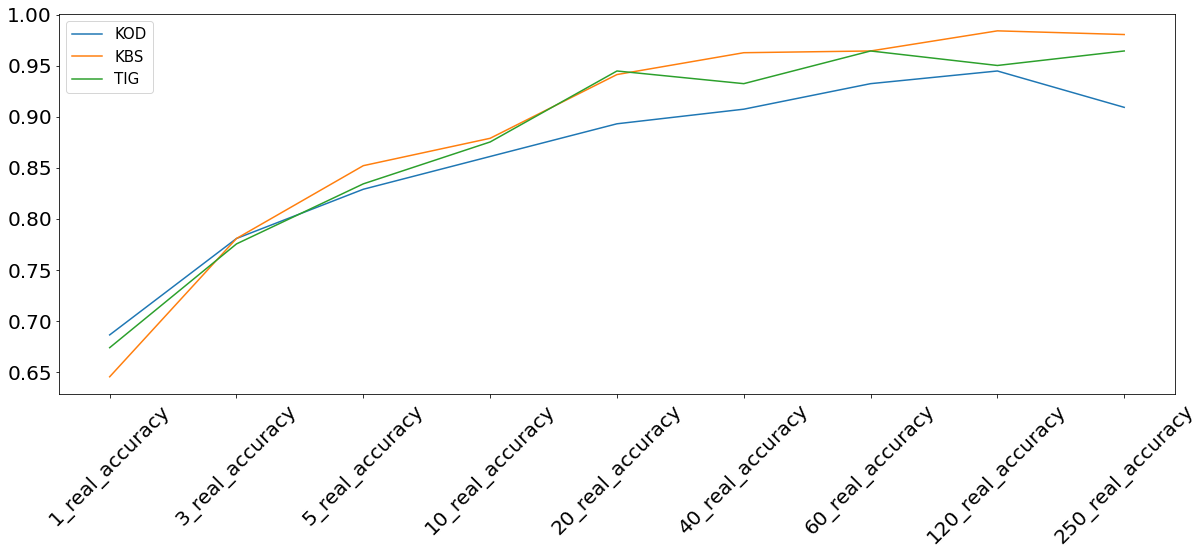

In [56]:
plt.figure(figsize = (20,7))
plt.plot(final_results[final_results.index.str.contains('real_accuracy')])
plt.xticks(rotation = 45, fontsize = 20)
plt.legend(final_results.columns, fontsize=15)
plt.yticks(fontsize = 20)
plt.show()